In [8]:
import numpy as np
import pandas as pd

#From pandas import series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

#rcParams['figure.figsize']=15,6

from sklearn.metrics  import mean_squared_error

In [9]:
df_airpassenger=pd.read_csv('AirPassengers.csv')
df_airpassenger.shape

(144, 2)

In [10]:
df_airpassenger.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
#Remove index column

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data=pd.read_csv('AirPassengers.csv',
                 parse_dates=['Month'],
                 index_col='Month',
                 date_parser=dateparse)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data.shape

(144, 1)

In [13]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
ts=data['Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [16]:
type(ts)

pandas.core.series.Series

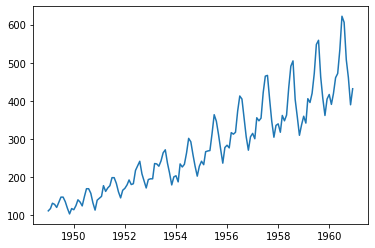

In [17]:
plt.plot(ts)

In [18]:
decomposition=seasonal_decompose(ts)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

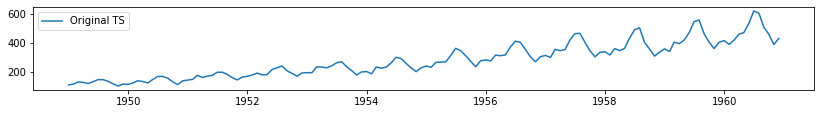

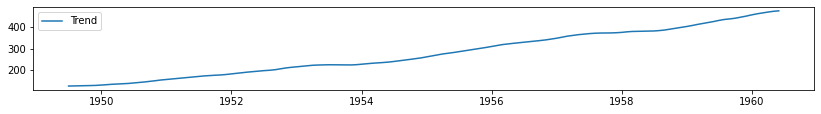

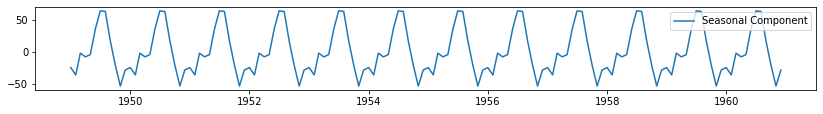

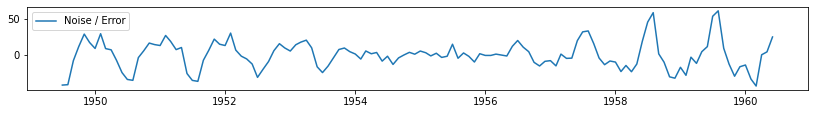

In [19]:
plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(ts,label='Original TS')
plt.legend(loc='best')

plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(seasonal,label='Seasonal Component')
plt.legend(loc='best')

plt.figure(figsize=(14,7))
plt.subplot(411)
plt.plot(residual,label='Noise / Error')
plt.legend(loc='best')

In [20]:
rolmean=ts.rolling(window=6).mean() #Higher the window value, smoother the curve
rolmean

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    519.166667
1960-09-01    534.000000
1960-10-01    534.000000
1960-11-01    520.333333
1960-12-01    503.166667
Name: Passengers, Length: 144, dtype: float64

In [21]:
dftest=adfuller(ts, autolag='AIC')
df

NameError: name 'df' is not defined

In [28]:
def test_stationary(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Moving Average')
    plt.legend(loc='best')
    plt.title('Original data and Moving Average')
    
    print('Result of Dicky Fuller Test')
    dftest=adfuller(timeseries, autolag='AIC')
    dfout=pd.Series(dftest[0:4], index = ['Test statitics', 'p-value', '#Lags used', '# Observations used' ])
    print(dfout)
    
    for key, value in dftest[4].items():
        dfout['Critical value (%s)' %key] = value
    print(dfout)

Result of Dicky Fuller Test
Test statitics           0.815369
p-value                  0.991880
#Lags used              13.000000
# Observations used    130.000000
dtype: float64
Test statitics            0.815369
p-value                   0.991880
#Lags used               13.000000
# Observations used     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


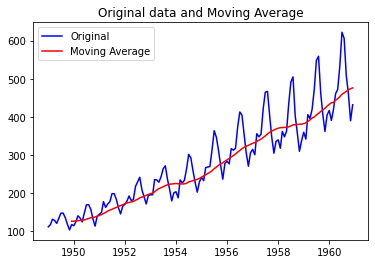

In [29]:
test_stationary(ts)

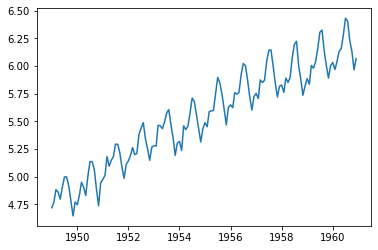

In [32]:
ts_log=np.log(ts)
plt.plot(ts_log)

Result of Dicky Fuller Test
Test statitics          -1.717017
p-value                  0.422367
#Lags used              13.000000
# Observations used    130.000000
dtype: float64
Test statitics           -1.717017
p-value                   0.422367
#Lags used               13.000000
# Observations used     130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


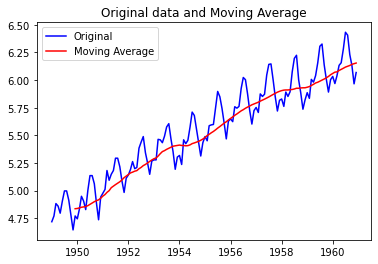

In [33]:
test_stationary(ts_log)

In [34]:
df_test=adfuller(ts_log, autolag='AIC')
df_test

(-1.7170170891069647,
 0.4223667747703892,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.39903124972057)

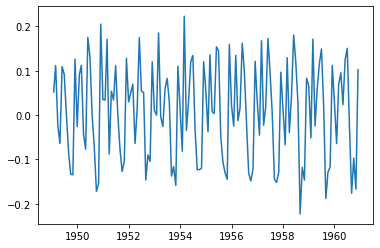

In [35]:
#Differencing data.shift() (Make data stationary)

ts_log_diff=ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [36]:
ts_log_diff

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 144, dtype: float64

In [39]:
print(ts_log_diff.dropna(inplace=True))

None


Result of Dicky Fuller Test
Test statitics          -2.717131
p-value                  0.071121
#Lags used              14.000000
# Observations used    128.000000
dtype: float64
Test statitics           -2.717131
p-value                   0.071121
#Lags used               14.000000
# Observations used     128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64


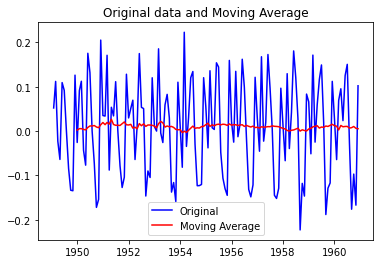

In [40]:
test_stationary(ts_log_diff)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.543786')

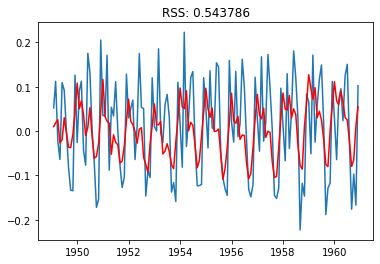

In [41]:
# p, d, q
model = ARIMA(ts_log, order=( 2, 1,1 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.000014')

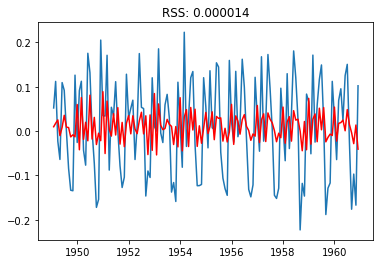

In [42]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,1 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.414108')

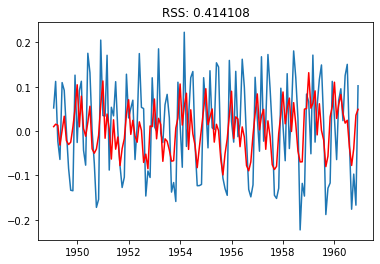

In [43]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,2 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.058462')

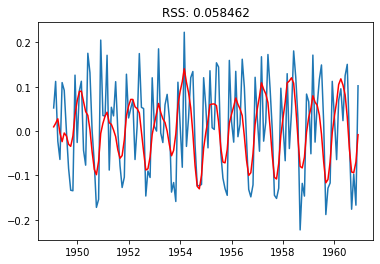

In [44]:
# p, d, q
model = ARIMA(ts_log, order=( 2, 1,2 ))

result = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result.fittedvalues - ts_log_diff)**2)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.000014')

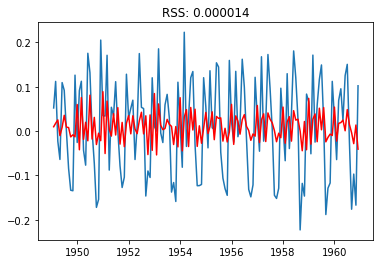

In [45]:
# p, d, q
model = ARIMA(ts_log, order=( 1, 1,1 ))

result_final = model.fit(disp = 1)
plt.plot(ts_log_diff)
plt.plot(result_final.fittedvalues, color = 'red')


plt.title('RSS: %4f' %sum(result_final.fittedvalues - ts_log_diff)**2)

In [48]:
print(144+12)

156


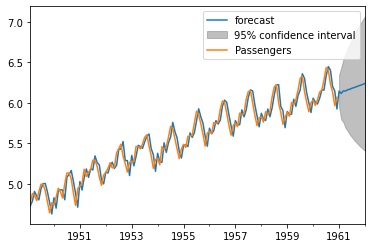

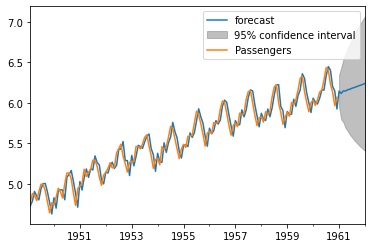

In [49]:
result_final.plot_predict(1,156)

In [50]:
forecasting = result_final.fittedvalues
forecasting

Month
1949-02-01    0.009800
1949-03-01    0.017618
1949-04-01    0.025229
1949-05-01   -0.010225
1949-06-01    0.008528
                ...   
1960-08-01    0.014654
1960-09-01   -0.003923
1960-10-01   -0.028363
1960-11-01    0.013642
1960-12-01   -0.040849
Length: 143, dtype: float64